In [27]:
import tensorflow as tf
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
from tensorflow import set_random_seed
set_random_seed(42)
np.random.seed(42)

In [3]:
from sklearn.model_selection import train_test_split
from tensorflow.python import keras
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten, Conv2D, Dropout
from tensorflow.python.keras.callbacks import ModelCheckpoint

In [4]:
train = pd.read_csv('fashion-mnist_train.csv')

In [5]:
test = pd.read_csv('fashion-mnist_test.csv')

In [6]:
train.shape, test.shape

((60000, 785), (10000, 785))

In [7]:
x_train = train.drop('label', axis=1)/255
y_train = train.label
x_test = test.drop('label', axis=1)/255
y_test = test.label

In [8]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()

In [9]:
y_train_labels = enc.fit_transform(np.reshape(np.array(y_train), (-1,1))).toarray()
y_test_labels = enc.transform(np.reshape(np.array(y_test), (-1,1))).toarray()

In [10]:
x_TRAIN, x_VALID, y_TRAIN, y_VALID = train_test_split(x_train, y_train_labels, test_size = 0.2, random_state=42)

### 1. Logistic regression

In [11]:
log_checkpoint = ModelCheckpoint('log_model.h5', save_best_only=True, save_weights_only=True, mode='max', monitor='val_acc')
model_log = Sequential()
model_log.add(Dense(10, input_shape=(784,), activation='softmax'))
model_log.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])        
history = model_log.fit(x_TRAIN.values, y_TRAIN, batch_size=500, validation_data=(x_VALID.values, y_VALID),
                       callbacks=[log_checkpoint], epochs=20)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 2s 35us/sample - loss: 1.6856 - acc: 0.5036 - val_loss: 1.3423 - val_acc: 0.6408
Epoch 2/20
48000/48000 [==============================] - 1s 30us/sample - loss: 1.2006 - acc: 0.6622 - val_loss: 1.0917 - val_acc: 0.6812
Epoch 3/20
48000/48000 [==============================] - 1s 30us/sample - loss: 1.0281 - acc: 0.6885 - val_loss: 0.9738 - val_acc: 0.7028
Epoch 4/20
48000/48000 [==============================] - 1s 30us/sample - loss: 0.9360 - acc: 0.7084 - val_loss: 0.9023 - val_acc: 0.7177
Epoch 5/20
48000/48000 [==============================] - 1s 30us/sample - loss: 0.8766 - acc: 0.7219 - val_loss: 0.8538 - val_acc: 0.7278
Epoch 6/20
48000/48000 [==============================] - 1s 30us/sample - loss: 0.8339 - acc: 0.7363 - val_loss: 0.8166 - val_acc: 0.741

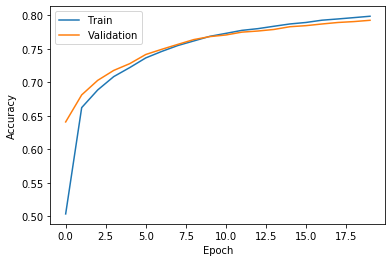

In [12]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

In [13]:
model_log.load_weights('log_model.h5')
_, score = model_log.evaluate(x_test.values, y_test_labels)
print("Logistic regression accuracy: {0:.3f}".format(score))

10000/10000 [==============================] - 0s 41us/sample - loss: 0.6359 - acc: 0.8000
Logistic regression accuracy: 0.800


### 2. Fully connected neural network

In [14]:
nn_checkpoint = ModelCheckpoint('nn_model.h5', save_best_only=True, save_weights_only=True, mode='max', monitor='val_acc')
model_nn = Sequential()
model_nn.add(Dense(512, activation='relu', input_shape=(784,)))
model_nn.add(Dropout(0.2))
model_nn.add(Dense(512, activation='relu'))
model_nn.add(Dropout(0.2))
model_nn.add(Dense(10, activation='softmax'))

model_nn.compile(optimizer='adadelta', loss='categorical_crossentropy', metrics=['accuracy'])

history_nn = model_nn.fit(x_TRAIN.values, y_TRAIN, batch_size=500, validation_data=(x_VALID.values, y_VALID),
                       callbacks=[nn_checkpoint], epochs=20)

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 10s 218us/sample - loss: 2.3233 - acc: 0.1196 - val_loss: 2.2458 - val_acc: 0.1538
Epoch 2/20
48000/48000 [==============================] - 10s 201us/sample - loss: 2.2580 - acc: 0.1567 - val_loss: 2.1812 - val_acc: 0.2165
Epoch 3/20
48000/48000 [==============================] - 10s 200us/sample - loss: 2.1970 - acc: 0.1894 - val_loss: 2.1191 - val_acc: 0.2913
Epoch 4/20
48000/48000 [==============================] - 10s 203us/sample - loss: 2.1378 - acc: 0.2339 - val_loss: 2.0580 - val_acc: 0.3473
Epoch 5/20
48000/48000 [==============================] - 10s 202us/sample - loss: 2.0808 - acc: 0.2764 - val_loss: 1.9976 - val_acc: 0.4296
Epoch 6/20
48000/48000 [==============================] - 10s 201us/sample - loss: 2.0221 - acc: 0.3329 - val_loss: 1.9379 - val_acc: 0.5014
Epoch 7/20
48000/48000 [==============================] - 10s 201us/sample - loss: 1.9655 - acc: 0.3802 

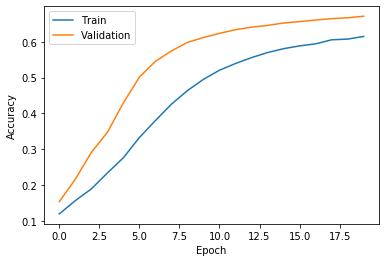

In [15]:
plt.plot(history_nn.history['acc'])
plt.plot(history_nn.history['val_acc'])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

In [16]:
model_nn.load_weights('nn_model.h5')
_, score = model_nn.evaluate(x_test.values, y_test_labels)
print("Fully connected neural network accuracy: {0:.3f}".format(score))

10000/10000 [==============================] - 1s 85us/sample - loss: 1.2734 - acc: 0.6740
Fully connected neural network accuracy: 0.674


### 3. Convolutional neural network

In [17]:
x_TRAIN_reshaped = x_TRAIN.values.reshape(48000, 28, 28, 1)
x_VALID_reshaped = x_VALID.values.reshape(12000, 28, 28, 1)
x_TEST_reshaped = x_test.values.reshape(10000, 28, 28, 1)

In [18]:
cnn_1_checkpoint = ModelCheckpoint('cnn1_model.h5', save_best_only=True, save_weights_only=True, mode='max', monitor='val_acc')
model_cnn_1 = tf.keras.models.Sequential()
model_cnn_1.add(tf.keras.layers.Convolution2D(32, (3,3), input_shape=(28, 28, 1), activation='relu'))
model_cnn_1.add(tf.keras.layers.MaxPooling2D((2,2)))
model_cnn_1.add(tf.keras.layers.Convolution2D(64, (3,3), activation='relu'))
model_cnn_1.add(tf.keras.layers.MaxPooling2D((2,2)))
model_cnn_1.add(tf.keras.layers.Flatten())
model_cnn_1.add(tf.keras.layers.Dense(64, activation='relu'))
model_cnn_1.add(tf.keras.layers.Dense(10, activation='softmax'))

model_cnn_1.compile(optimizer='adadelta', loss='categorical_crossentropy', metrics=['accuracy'])

history_cnn1 = model_cnn_1.fit(x_TRAIN_reshaped, y_TRAIN, batch_size=500, validation_data=(x_VALID_reshaped, y_VALID),
                       callbacks=[cnn_1_checkpoint], epochs=10)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 34s 701us/sample - loss: 2.3001 - acc: 0.1059 - val_loss: 2.2963 - val_acc: 0.1051
Epoch 2/10
48000/48000 [==============================] - 33s 681us/sample - loss: 2.2924 - acc: 0.1079 - val_loss: 2.2882 - val_acc: 0.1072
Epoch 3/10
48000/48000 [==============================] - 33s 683us/sample - loss: 2.2841 - acc: 0.1114 - val_loss: 2.2796 - val_acc: 0.1117
Epoch 4/10
48000/48000 [==============================] - 33s 681us/sample - loss: 2.2752 - acc: 0.1170 - val_loss: 2.2702 - val_acc: 0.1181
Epoch 5/10
48000/48000 [==============================] - 33s 682us/sample - loss: 2.2656 - acc: 0.1244 - val_loss: 2.2603 - val_acc: 0.1290
Epoch 6/10
48000/48000 [==============================] - 33s 682us/sample - loss: 2.2557 - acc: 0.1362 - val_loss: 2.2503 - val_acc: 0.1451
Epoch 7/10
48000/48000 [==============================] - 33s 684us/sample - loss: 2.2457 - acc: 0.1531 

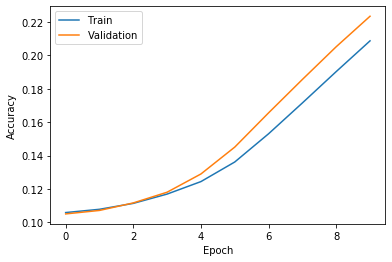

In [19]:
plt.plot(history_cnn1.history['acc'])
plt.plot(history_cnn1.history['val_acc'])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

In [20]:
model_cnn_1.load_weights('cnn1_model.h5')
_, score = model_cnn_1.evaluate(x_TEST_reshaped, y_test_labels)
print("Convolutional neural network accuracy: {0:.3f}".format(score))

10000/10000 [==============================] - 4s 357us/sample - loss: 2.2064 - acc: 0.2193
Convolutional neural network accuracy: 0.219


### Add additional layers

In [21]:
cnn_2_checkpoint = ModelCheckpoint('cnn2_model.h5', save_best_only=True, save_weights_only=True, mode='max', monitor='val_acc')
model_cnn_2 = tf.keras.models.Sequential()
model_cnn_2.add(tf.keras.layers.Convolution2D(32, (3,3), input_shape=(28, 28, 1), activation='relu'))
model_cnn_2.add(tf.keras.layers.Convolution2D(32, (3,3), activation='relu'))
model_cnn_2.add(tf.keras.layers.MaxPooling2D((2,2)))
model_cnn_2.add(tf.keras.layers.Convolution2D(64, (3,3), activation='relu'))
model_cnn_2.add(tf.keras.layers.Convolution2D(64, (3,3), activation='relu'))
model_cnn_2.add(tf.keras.layers.MaxPooling2D((2,2)))
model_cnn_2.add(tf.keras.layers.Flatten())
model_cnn_2.add(tf.keras.layers.Dense(128, activation='relu'))
model_cnn_2.add(tf.keras.layers.Dense(64, activation='relu'))
model_cnn_2.add(tf.keras.layers.Dense(10, activation='softmax'))

model_cnn_2.compile(optimizer='adadelta',loss='categorical_crossentropy', metrics=['accuracy'])
    
history_cnn2 = model_cnn_2.fit(x_TRAIN_reshaped, y_TRAIN, batch_size=500, validation_data=(x_VALID_reshaped, y_VALID),
                       callbacks=[cnn_2_checkpoint], epochs=10)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 59s 1ms/sample - loss: 2.2999 - acc: 0.1535 - val_loss: 2.2982 - val_acc: 0.1524
Epoch 2/10
48000/48000 [==============================] - 58s 1ms/sample - loss: 2.2968 - acc: 0.1602 - val_loss: 2.2952 - val_acc: 0.1597
Epoch 3/10
48000/48000 [==============================] - 59s 1ms/sample - loss: 2.2938 - acc: 0.1676 - val_loss: 2.2922 - val_acc: 0.1675
Epoch 4/10
48000/48000 [==============================] - 58s 1ms/sample - loss: 2.2908 - acc: 0.1776 - val_loss: 2.2891 - val_acc: 0.1783
Epoch 5/10
48000/48000 [==============================] - 58s 1ms/sample - loss: 2.2877 - acc: 0.1888 - val_loss: 2.2859 - val_acc: 0.1901
Epoch 6/10
48000/48000 [==============================] - 58s 1ms/sample - loss: 2.2844 - acc: 0.2014 - val_loss: 2.2826 - val_acc: 0.2052
Epoch 7/10
48000/48000 [==============================] - 58s 1ms/sample - loss: 2.2811 - acc: 0.2173 - val_loss: 2.

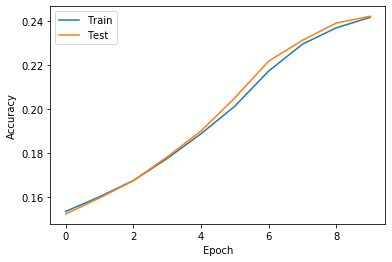

In [22]:
plt.plot(history_cnn2.history['acc'])
plt.plot(history_cnn2.history['val_acc'])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

In [23]:
_, score = model_cnn_2.evaluate(x_TEST_reshaped, y_test_labels)
print("Convolutional neural network-2   accuracy: {0:.3f}".format(score))

10000/10000 [==============================] - 6s 603us/sample - loss: 2.2668 - acc: 0.2463
Convolutional neural network-2   accuracy: 0.246


### Add batch normalization layers

In [24]:
cnn_3_checkpoint = ModelCheckpoint('cnn3_model.h5', save_best_only=True, save_weights_only=True, mode='max', monitor='val_acc')
model_cnn_3b = tf.keras.models.Sequential()
model_cnn_3b.add(tf.keras.layers.Convolution2D(32, (3,3), input_shape=(28, 28, 1), activation='relu'))
model_cnn_3b.add(tf.keras.layers.BatchNormalization())
model_cnn_3b.add(tf.keras.layers.Convolution2D(32, (3,3), activation='relu'))
model_cnn_3b.add(tf.keras.layers.BatchNormalization())
model_cnn_3b.add(tf.keras.layers.MaxPooling2D((2,2)))
model_cnn_3b.add(tf.keras.layers.Convolution2D(64, (3,3), activation='relu'))
model_cnn_3b.add(tf.keras.layers.BatchNormalization())
model_cnn_3b.add(tf.keras.layers.Convolution2D(64, (3,3), activation='relu'))
model_cnn_3b.add(tf.keras.layers.BatchNormalization())
model_cnn_3b.add(tf.keras.layers.MaxPooling2D((2,2)))
model_cnn_3b.add(tf.keras.layers.Flatten())
model_cnn_3b.add(tf.keras.layers.Dense(128, activation='relu'))
model_cnn_3b.add(tf.keras.layers.Dense(32, activation='relu'))
model_cnn_3b.add(tf.keras.layers.Dense(10, activation='softmax'))

model_cnn_3b.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])
    
history_cnn3 = model_cnn_3b.fit(x_TRAIN_reshaped, y_TRAIN, batch_size=500, validation_data=(x_VALID_reshaped, y_VALID),
                       callbacks=[cnn_3_checkpoint], epochs=10)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 120s 2ms/sample - loss: 0.5099 - acc: 0.8188 - val_loss: 2.3447 - val_acc: 0.1007
Epoch 2/10
48000/48000 [==============================] - 111s 2ms/sample - loss: 0.2843 - acc: 0.8985 - val_loss: 2.3731 - val_acc: 0.2022
Epoch 3/10
48000/48000 [==============================] - 111s 2ms/sample - loss: 0.2303 - acc: 0.9180 - val_loss: 2.6414 - val_acc: 0.2648
Epoch 4/10
48000/48000 [==============================] - 111s 2ms/sample - loss: 0.1923 - acc: 0.9310 - val_loss: 2.6991 - val_acc: 0.3355
Epoch 5/10
48000/48000 [==============================] - 110s 2ms/sample - loss: 0.1649 - acc: 0.9405 - val_loss: 1.1308 - val_acc: 0.7082
Epoch 6/10
48000/48000 [==============================] - 111s 2ms/sample - loss: 0.1435 - acc: 0.9478 - val_loss: 0.6518 - val_acc: 0.8110
Epoch 7/10
48000/48000 [==============================] - 111s 2ms/sample - loss: 0.1143 - acc: 0.9597 - val_l

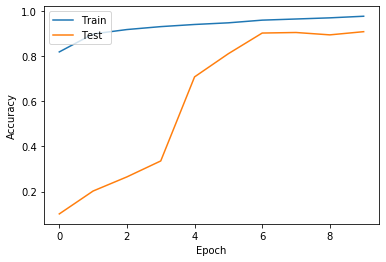

In [25]:
plt.plot(history_cnn3.history['acc'])
plt.plot(history_cnn3.history['val_acc'])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

In [26]:
model_cnn_3b.load_weights('cnn3_model.h5')
_, score = model_cnn_3b.evaluate(x_TEST_reshaped, y_test_labels)
print("Convolutional neural network-3   accuracy: {0:.3f}".format(score))

10000/10000 [==============================] - 8s 848us/sample - loss: 0.2941 - acc: 0.9142
Convolutional neural network-3   accuracy: 0.914
